# Part 2 of data story

## This notebook aims at analysing the respected media and the most popular ones 

The list of most respected media is taken from the Top 10 Forbes: https://www.forbes.com/sites/berlinschoolofcreativeleadership/2017/02/01/10-journalism-brands-where-you-will-find-real-facts-rather-than-alternative-facts/?sh=1c18e04de9b5

--> We take 5 which are common to at least 3 years

The list of most popular/read media is taken from: https://www.similarweb.com/top-websites/category/news-and-media/

We take 5 in order which appear in at least 3 years 

# TODO:
- Change colors, choose one for female/male other for respected/popular media
--> Done for respected and popular, NOW FOR FEMALE AND MALE :)

In [34]:
# Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [35]:
#Settings for the plots 
sns.set_style("ticks")
colors= sns.color_palette('colorblind')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 6

sns.set_style("darkgrid", {'axes.grid' : False, 'ytick.left': True, 'xtick.bottom': True})

In [3]:

DATA_PATH = 'data/'
DATA_PATH2015 = DATA_PATH + 'data_2015/'
DATA_PATH2016 = DATA_PATH + 'data_2016/'
DATA_PATH2017 = DATA_PATH + 'data_2017/'
DATA_PATH2018 = DATA_PATH + 'data_2018/'
DATA_PATH2019 = DATA_PATH + 'data_2019/'
DATA_PATH2020 = DATA_PATH + 'data_2020/'

FILE2015 = DATA_PATH2015 + 'M3_df_2015_complete.pkl'
FILE2016 = DATA_PATH2016 + 'M3_df_2016_complete.pkl'
FILE2017 = DATA_PATH2017 + 'M3_df_2017_complete.pkl'
FILE2018 = DATA_PATH2018 + 'M3_df_2018_complete.pkl'
FILE2019 = DATA_PATH2019 + 'M3_df_2019_complete.pkl'
FILE2020 = DATA_PATH2020 + 'M3_df_2020_complete.pkl'

FILES = [FILE2015, FILE2016, FILE2017, FILE2018, FILE2019, FILE2020]

In [4]:
def extract_media_interest(df, PATHYEAR, FILEYEAR, top_5_media, respected = True):
    """
        
    """
    df_expl_sitenames = df.explode(["sitenames"])
    df_expl_tags = df.drop(columns = ['speaker', 'qids', 'quoteID', 'quotation', 'date', 'urls', 'sitenames',
       'domain', 'gender', 'citizenship', 'Description',
       'date_of_birth', 'media_country_qid', 'numOcurrences', 'age',
       'age_range', 'Continent', 'quotation_length', 'media_country']).explode(["tags"])

    df_expl_sitenames["tags"] = df_expl_tags
    # Extract media of interest
    df_media = df_expl_sitenames[df_expl_sitenames["sitenames"].isin(top_5_media)]

    
    # Drop columns we do not wish to analyse
    df_media.drop(columns = [ 'date', 'urls', 
       'domain', 'Description',
       'date_of_birth', 'media_country_qid', 'numOcurrences',
         "media_country"], inplace = True)
    if respected:
        with open(PATHYEAR + f'M3_df_{FILEYEAR[10:14]}_respected_media.pkl', 'wb') as output:
            pickle.dump(df_media, output)
    else:
        with open(PATHYEAR + f'M3_df_{FILEYEAR[10:14]}_popular_media.pkl', 'wb') as output:
            pickle.dump(df_media, output)
    return df_media

In [5]:
# How I found the media belonging to a year
#list_media_2015 = df_2015.explode(["sitenames"])["sitenames"].value_counts().index
top5_respected_media = ["nytimes", "washingtonpost", "bbc", "reuters", "politico"]
top5_popular_media = ["yahoo", "msn","bbc", "cnn", "nytimes"]

with open(FILE2015, 'rb') as input_file:
    df_2015_base = pickle.load(input_file)

with open(FILE2016, 'rb') as input_file:
    df_2016_base = pickle.load(input_file)

with open(FILE2017, 'rb') as input_file:
    df_2017_base = pickle.load(input_file)
    

with open(FILE2018, 'rb') as input_file:
    df_2018_base = pickle.load(input_file)

with open(FILE2019, 'rb') as input_file:
    df_2019_base = pickle.load(input_file)

with open(FILE2020, 'rb') as input_file:
    df_2020_base = pickle.load(input_file)

df_2015 = df_2015_base.copy()

df_2016 = df_2016_base.copy()

df_2017 = df_2017_base.copy()

df_2018 = df_2018_base.copy()

df_2019 = df_2019_base.copy()

df_2020 = df_2020_base.copy()

#### This is to be run when processing for the respected files
##### They are now pickled below


df_2015_respected_media = extract_media_interest(df_2015, DATA_PATH2015, FILE2015, top5_respected_media, respected = True)
df_2016_respected_media = extract_media_interest(df_2016, DATA_PATH2016, FILE2016, top5_respected_media, respected = True)
df_2017_respected_media = extract_media_interest(df_2017, DATA_PATH2017, FILE2017, top5_respected_media, respected = True)
df_2018_respected_media = extract_media_interest(df_2018, DATA_PATH2018, FILE2018, top5_respected_media, respected = True)
df_2019_respected_media = extract_media_interest(df_2019, DATA_PATH2019, FILE2019, top5_respected_media, respected = True)
df_2020_respected_media = extract_media_interest(df_2020, DATA_PATH2020, FILE2020, top5_respected_media, respected = True)

#### This is to be run when processing for the popular files
##### They are now pickled below


df_2015_popular_media = extract_media_interest(df_2015, DATA_PATH2015, FILE2015, top5_popular_media, respected = False)
df_2016_popular_media = extract_media_interest(df_2016, DATA_PATH2016, FILE2016, top5_popular_media, respected = False)
df_2017_popular_media = extract_media_interest(df_2017, DATA_PATH2017, FILE2017, top5_popular_media, respected = False)
df_2018_popular_media = extract_media_interest(df_2018, DATA_PATH2018, FILE2018, top5_popular_media, respected = False)
df_2019_popular_media = extract_media_interest(df_2019, DATA_PATH2019, FILE2019, top5_popular_media, respected = False)
df_2020_popular_media = extract_media_interest(df_2020, DATA_PATH2020, FILE2020, top5_popular_media, respected = False)

In [6]:
# Respected media 
with open(DATA_PATH2015 + f'M3_df_{FILE2015[10:14]}_respected_media.pkl', 'rb') as input_file:
    df_2015_respected_media = pickle.load(input_file)
with open(DATA_PATH2016 + f'M3_df_{FILE2016[10:14]}_respected_media.pkl', 'rb') as input_file:
    df_2016_respected_media = pickle.load(input_file)
with open(DATA_PATH2017 + f'M3_df_{FILE2017[10:14]}_respected_media.pkl', 'rb') as input_file:
    df_2017_respected_media = pickle.load(input_file)
with open(DATA_PATH2018 + f'M3_df_{FILE2018[10:14]}_respected_media.pkl', 'rb') as input_file:
    df_2018_respected_media = pickle.load(input_file)
with open(DATA_PATH2019 + f'M3_df_{FILE2019[10:14]}_respected_media.pkl', 'rb') as input_file:
    df_2019_respected_media = pickle.load(input_file)
with open(DATA_PATH2020 + f'M3_df_{FILE2020[10:14]}_respected_media.pkl', 'rb') as input_file:
    df_2020_respected_media =  pickle.load(input_file)

In [7]:
# Popular media 
with open(DATA_PATH2015 + f'M3_df_{FILE2015[10:14]}_popular_media.pkl', 'rb') as input_file:
    df_2015_popular_media = pickle.load(input_file)
with open(DATA_PATH2016 + f'M3_df_{FILE2016[10:14]}_popular_media.pkl', 'rb') as input_file:
    df_2016_popular_media = pickle.load(input_file)
with open(DATA_PATH2017 + f'M3_df_{FILE2017[10:14]}_popular_media.pkl', 'rb') as input_file:
    df_2017_popular_media = pickle.load(input_file)
with open(DATA_PATH2018 + f'M3_df_{FILE2018[10:14]}_popular_media.pkl', 'rb') as input_file:
    df_2018_popular_media = pickle.load(input_file)
with open(DATA_PATH2019 + f'M3_df_{FILE2019[10:14]}_popular_media.pkl', 'rb') as input_file:
    df_2019_popular_media = pickle.load(input_file)
with open(DATA_PATH2020 + f'M3_df_{FILE2020[10:14]}_popular_media.pkl', 'rb') as input_file:
    df_2020_popular_media =  pickle.load(input_file)

In [8]:
df_list_respect = [df_2015_respected_media, df_2016_respected_media, df_2017_respected_media, df_2018_respected_media, df_2019_respected_media,
                  df_2020_respected_media]



In [9]:
df_list_popular = [df_2015_popular_media, df_2016_popular_media, df_2017_popular_media, df_2018_popular_media, df_2019_popular_media,
                  df_2020_popular_media]

## Proportion of quotes depending on gender

In [10]:

def count_by_gender_without_occurences(df):
    """
        Function compute the number of quotes depending on `gender`
    :param df: dataframe 
    :return gender_count: dataframe of the number of quotes for one year
    """
    gender_count = df.groupby(by=['gender'])["speaker"].count().to_frame().T
    return gender_count

In [11]:
def gather_all_years_to_one_df(df_list):
    """
        Function to merge all the years in one dataframe
    :param df: list of Dataframes 
    :return gender_count_all_years: dataframe of the number of quotes for all the years 
    :return year_list: list of years (integer format)
    """
    gender_list = []
    year_list = []
    for df in df_list:
        year = df['quoteID'].iloc[0][0:4]
        gender_count = count_by_gender_without_occurences(df)
        gender_list.append(gender_count)
        year_list.append(int(year))
    gender_count_all_years = pd.concat(gender_list)
    return gender_count_all_years, year_list

In [12]:
def gender_all_years_extension(df_list):
    """
        Function to add columns with the relative number of quotes for both gender for all the Dataframes in `df_list`
    :param df_list: list of Dataframes 
    :return gender_all_years: DataFrame with added columns `% Female/Male` and the `year`
    """
    gender_all_years, year_list = gather_all_years_to_one_df(df_list)
    gender_all_years['percentage_female'] = gender_all_years['Female']/(gender_all_years['Female'] + gender_all_years['Male'])
    gender_all_years['percentage_male'] = gender_all_years['Male']/(gender_all_years['Female'] + gender_all_years['Male'])
    gender_all_years['year'] = year_list
    return gender_all_years

In [13]:
def plot_gender_all_years(gender_all_years, type_media = "respected"):
    """
        Function to plot the proportion of quotes depending on `gender`
    :param gender_all_years: data frame with percentage of males/females
    """       
    fig2 = gender_all_years[["percentage_male","percentage_female"]].plot(kind='bar', title=f'Percentage of quotations per gender for the top 5 {type_media} media', rot=0, xlabel='Years', ylabel='% of quotations', figsize=(16,6))

In [14]:

gender_all_years_extended_res = gender_all_years_extension(df_list_respect)
gender_all_years_extended_res["Respected"] = True

gender_all_years_extended_pop = gender_all_years_extension(df_list_popular)
gender_all_years_extended_pop["Respected"] = False


In [15]:
df_pop_res_all = gender_all_years_extended_res.append(gender_all_years_extended_pop)

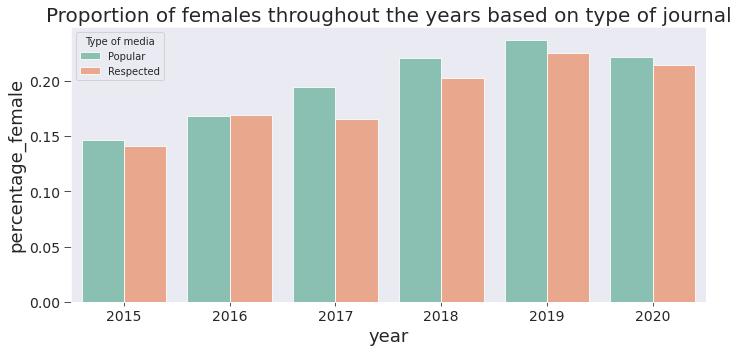

In [179]:
plt.figure(figsize=(10,5))
labels = ["Popular", "Respected"]
g= sns.barplot(data = df_pop_res_all.reset_index(), x = "year", y = "percentage_female", hue = "Respected" ,palette=sns.color_palette("Set2"), alpha = 0.8)
h, l = g.get_legend_handles_labels()
g.legend(h, labels, title="Type of media")
plt.title("Proportion of females throughout the years based on type of journal")
plt.tight_layout()
plt.show(g)

**Interpretation**
It seems that the proportion of women in both the respected and the popular media is increasing.

It is interesting to note that it tends to be higher for popular media than respected; we shall analyse this further

### Sitenames proportion and plot

In [39]:
def create_df_sitenames_proportion(df, threshold_tot = 1000):
    """
        param threshold_tot: Keep only media with at least this number of quotes available
    """
    
    df_site = df.groupby(["sitenames","gender"]).quoteID.count().to_frame(name="Count").sort_values(['Count'],ascending=False).reset_index()
    df_site_tot = df_site.groupby(['sitenames']).Count.sum().to_frame(name="Total").reset_index()
    df_site = df_site.merge(df_site_tot, on='sitenames')
    df_site = df_site[df_site.Total > threshold_tot]
    df_site['Proportion']  = (df_site['Count']/df_site['Total'])*100
    year = df.iloc[0]["quoteID"][0:4]
    df_site["Year"] = year
    return df_site


In [40]:
def loop_all_sitenames_proportion(df_list):
    df_all_sites = pd.DataFrame(columns=['sitenames', 'gender', 'Count', 'Total', 'Proportion', 'Year'], dtype='object')
    for df in df_list:
        df_site = create_df_sitenames_proportion(df)
        df_all_sites = df_all_sites.append(df_site)
        
    return df_all_sites
        

In [41]:
df_all_sites_respect = loop_all_sitenames_proportion(df_list_respect)
df_all_sites_popular = loop_all_sitenames_proportion(df_list_popular)

In [42]:
df_all_sites_male_res = df_all_sites_respect[df_all_sites_respect.gender == "Male"]
df_all_sites_male_pop = df_all_sites_popular[df_all_sites_popular.gender == "Male"]

df_all_sites_female_res = df_all_sites_respect[df_all_sites_respect.gender == "Female"]
df_all_sites_female_pop = df_all_sites_popular[df_all_sites_popular.gender == "Female"]

In [43]:
colorblind_RGB = sns.color_palette("colorblind")

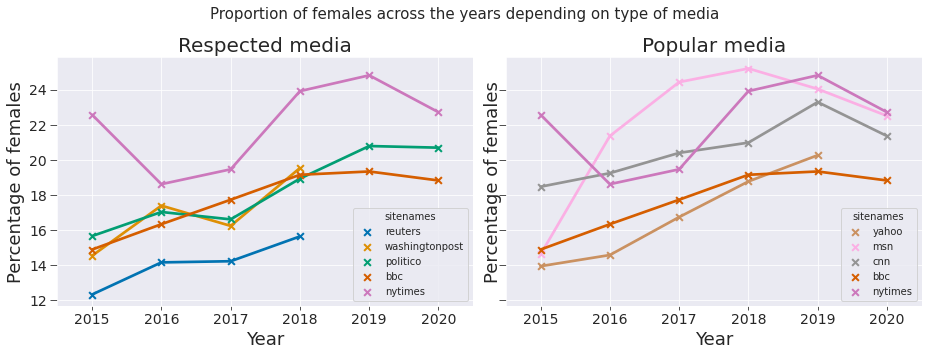

In [44]:
f, axs = plt.subplots(1,2,
                      figsize=(13,5),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,3]))
plt.suptitle("Proportion of females across the years depending on type of media", fontsize = 15)
colors_respected = [""]
colors_popular = [""]
sns.pointplot(data=df_all_sites_female_res, x="Year", y = "Proportion", hue = "sitenames", markers='x', ax = axs[0], palette = colorblind_RGB[:5])
sns.pointplot(data=df_all_sites_female_pop, x="Year", y = "Proportion", hue = "sitenames", markers='x', ax = axs[1], palette = [colorblind_RGB[5],colorblind_RGB[6], colorblind_RGB[7], colorblind_RGB[3], colorblind_RGB[4]])
axs[1].set(xlabel='Year', ylabel='Percentage of females')
axs[1].grid("True")
axs[0].set(xlabel='Year', ylabel='Percentage of females')
axs[0].grid("True")
axs[0].set_title("Respected media")
axs[1].set_title("Popular media")
f.tight_layout()

## Proportion of quotes per age

In [45]:
def create_df_age_proportion(df, threshold_tot = 1000):
    """
        param threshold_tot: Keep only media with at least this number of quotes available
    """
    
    df_age_range = df.groupby(["age_range","gender"]).age_range.count().to_frame(name="Count").sort_values(['Count'],ascending=False).reset_index()
    df_age_range_tot = df_age_range.groupby(['gender']).Count.sum().to_frame(name="Total").reset_index()
    df_age_range = df_age_range.merge(df_age_range_tot, on='gender')
    df_age_range = df_age_range[df_age_range.Total > threshold_tot]
    df_age_range['Proportion']  = (df_age_range['Count']/df_age_range['Total'])*100
    return df_age_range

In [46]:
def append_all_df(df_list, columns, with_year = False):
    df_appended = pd.DataFrame(columns = columns)
    for df in df_list:
        if with_year:
            year = df.iloc[0].quoteID[:4]
            df["Year"] = year
        df_appended = df_appended.append(df[columns])
    return df_appended

In [47]:
df_all_age_range_appended_popular = append_all_df(df_list_popular, columns = ["gender", "sitenames", "age_range"])
df_all_age_range_appended_respect = append_all_df(df_list_respect, columns = ["gender", "sitenames", "age_range"])

In [48]:
df_all_age_proportion_popular = create_df_age_proportion(df_all_age_range_appended_popular, threshold_tot = 1000)
df_all_age_proportion_respect = create_df_age_proportion(df_all_age_range_appended_respect, threshold_tot = 1000)

Text(0.5, 1.0, 'Proportion for all years combined for the respected medias')

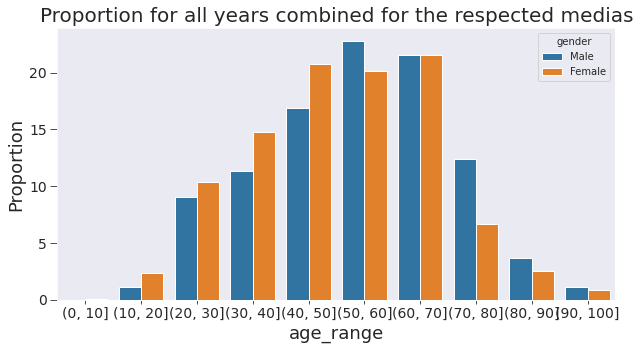

In [49]:

f = plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_all_age_proportion_respect, x='age_range',y='Proportion', hue='gender')
plt.title("Proportion for all years combined for the respected medias")

Text(0.5, 1.0, 'Proportion for all years combined for the popular medias')

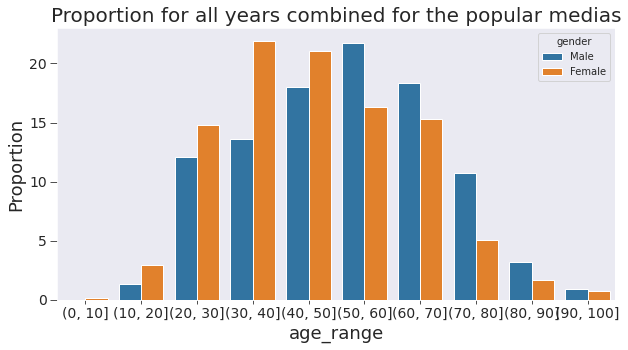

In [50]:

f = plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_all_age_proportion_popular, x='age_range',y='Proportion', hue='gender')
plt.title("Proportion for all years combined for the popular medias")

### Not very clear graphs, plotted again below for more info

In [51]:
df_all_age_proportion_popular_female = df_all_age_proportion_popular[df_all_age_proportion_popular["gender"] == "Female"]
df_all_age_proportion_popular_male = df_all_age_proportion_popular[df_all_age_proportion_popular["gender"] == "Male"]

In [52]:
df_all_age_proportion_respect_female = df_all_age_proportion_respect[df_all_age_proportion_respect["gender"] == "Female"]
df_all_age_proportion_respect_male = df_all_age_proportion_respect[df_all_age_proportion_respect["gender"] == "Male"]

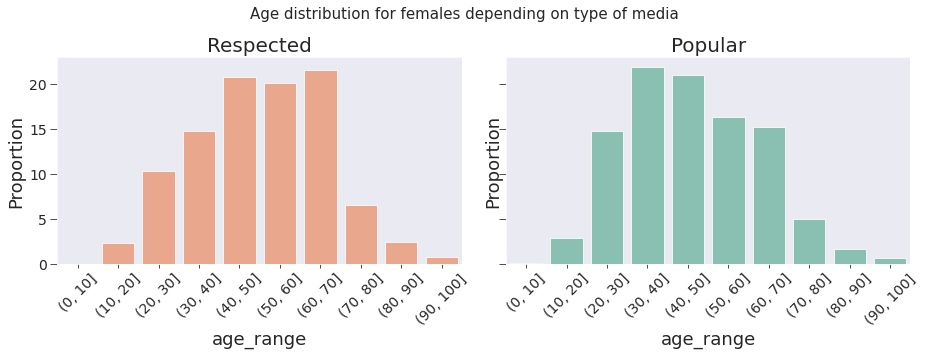

In [190]:
f, axs = plt.subplots(1,2,
                      figsize=(13,5),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[4,4]))

sns.barplot(data=df_all_age_proportion_respect_female, x='age_range',y='Proportion',ax=axs[0], color=sns.color_palette("Set2")[1], alpha = 0.8)
sns.barplot(data=df_all_age_proportion_popular_female, x='age_range',y='Proportion',ax=axs[1],color=sns.color_palette("Set2")[0], alpha = 0.8)
plt.suptitle("Age distribution for females depending on type of media", fontsize = 15)
axs[0].set_title('Respected')
axs[1].set_title('Popular')
axs[0].tick_params(axis = 'x',labelrotation=45)
axs[1].tick_params(labelrotation=45)
f.tight_layout()

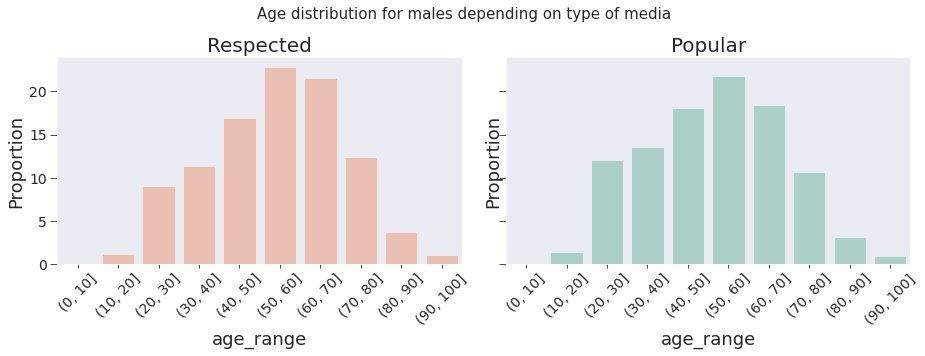

In [192]:
f, axs = plt.subplots(1,2,
                      figsize=(13,5),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,3]))
plt.suptitle("Age distribution for males depending on type of media", fontsize = 15)
sns.barplot(data=df_all_age_proportion_respect_male, x='age_range',y='Proportion',ax=axs[0], color=sns.color_palette("Set2")[1], alpha = 0.5)
sns.barplot(data=df_all_age_proportion_popular_male, x='age_range',y='Proportion',ax=axs[1], color=sns.color_palette("Set2")[0], alpha = 0.5)
axs[0].set_title('Respected')
axs[1].set_title('Popular')
axs[0].tick_params(axis = 'x',labelrotation=45)
axs[1].tick_params(labelrotation=45)
f.tight_layout()

In [187]:
sns.color_palette("Set2")[0]

(0.4, 0.7607843137254902, 0.6470588235294118)

**Interpretation**

Super interesting to see that the trend is a normal distribution for males, but not for females, particularly in the popular news

## Proportion of quotes depending on length of quotes

In [58]:
df_respect_quote_length = append_all_df(df_list_respect, columns = ['gender','quotation_length', 'Year'], with_year = "True")

In [60]:
# Append all years with the columns of interest
df_popular_quote_length = append_all_df(df_list_popular, columns = ['gender','quotation_length', 'Year'], with_year = True)
df_respect_quote_length = append_all_df(df_list_respect, columns = ['gender','quotation_length', 'Year'], with_year = True)

In [61]:
# Extrat statistics of interest for quotation length 
stats_length_popular = df_popular_quote_length.groupby(['gender',"Year"])['quotation_length'].agg(['mean', 'count', 'std'])
stats_length_respect = df_respect_quote_length.groupby(['gender',"Year"])['quotation_length'].agg(['mean', 'count', 'std'])

In [62]:
# For computing the 95 %interval confidence
import math
ci95_hi_pop = []
ci95_lo_pop = []
ci95_hi_res = []
ci95_lo_res = []

for i in stats_length_popular.index:
    m_pop, c_pop, s_pop = stats_length_popular.loc[i]
    m_res, c_res, s_res = stats_length_respect.loc[i]
    ci95_hi_pop.append(m_pop + 1.96*s_pop/math.sqrt(c_pop))
    ci95_lo_pop.append(m_pop - 1.96*s_pop/math.sqrt(c_pop))
    ci95_hi_res.append(m_res + 1.96*s_res/math.sqrt(c_res))
    ci95_lo_res.append(m_res - 1.96*s_res/math.sqrt(c_res))

stats_length_popular['ci95_hi'] = ci95_hi_pop
stats_length_popular['ci95_lo'] = ci95_lo_pop

stats_length_respect['ci95_hi'] = ci95_hi_res
stats_length_respect['ci95_lo'] = ci95_lo_res

In [63]:
stats_length_popular.reset_index(inplace = True)

In [64]:
stats_length_respect.reset_index(inplace = True)

In [65]:
# Separate statistics by gender
stats_length_popular_female = stats_length_popular[stats_length_popular["gender"] == "Female"]
stats_length_popular_male = stats_length_popular[stats_length_popular["gender"] == "Male"]

stats_length_respect_female = stats_length_respect[stats_length_respect["gender"] == "Female"]
stats_length_respect_male = stats_length_respect[stats_length_respect["gender"] == "Male"]

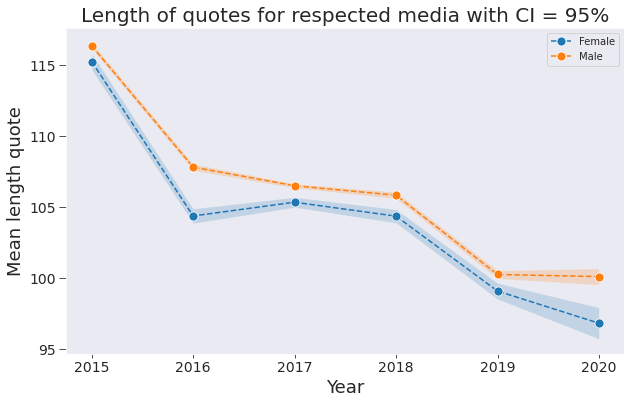

In [66]:
plt.figure(figsize = (10,6))
plt.title("Length of quotes for respected media with CI = 95%")
ax = sns.lineplot(data = stats_length_respect_female, x = "Year", y = "mean", label = "Female", marker='o', linestyle='--', markersize=9)
ax.fill_between(stats_length_respect_female["Year"], stats_length_respect_female["ci95_lo"], stats_length_respect_female["ci95_hi"], alpha = 0.2)
ax = sns.lineplot(data = stats_length_respect_male, x = "Year", y = "mean",label = "Male",  linestyle='--', markers=True,  marker='o', markersize=9)
ax.fill_between(stats_length_respect_male["Year"], stats_length_respect_male["ci95_lo"], stats_length_respect_male["ci95_hi"], alpha = 0.2)
plt.ylabel("Mean length quote");

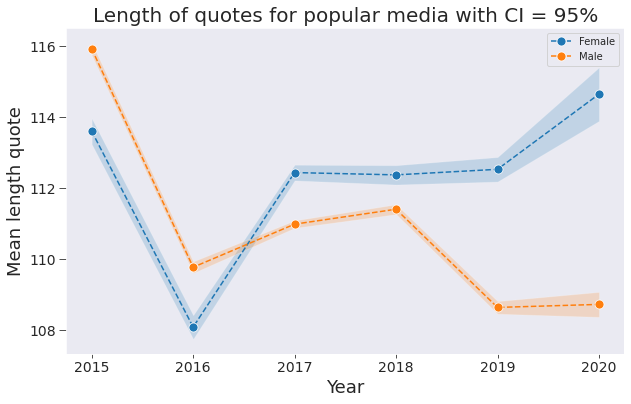

In [67]:
plt.figure(figsize = (10,6))
plt.title("Length of quotes for popular media with CI = 95%")
ax = sns.lineplot(data = stats_length_popular_female, x = "Year", y = "mean", label = "Female", marker='o', linestyle='--', markersize=9)

ax.fill_between(stats_length_popular_female["Year"], stats_length_popular_female["ci95_lo"], stats_length_popular_female["ci95_hi"], alpha = 0.2)
ax = sns.lineplot(data = stats_length_popular_male, x = "Year", y = "mean",label = "Male",  linestyle='--', markers=True,  marker='o', markersize=9)
ax.fill_between(stats_length_popular_male["Year"], stats_length_popular_male["ci95_lo"], stats_length_popular_male["ci95_hi"], alpha = 0.2)
plt.ylabel("Mean length quote");

In [68]:
def create_df_media(df):
    df_sitenames_explode = df.explode("sitenames")
    df_sitenames = df_sitenames_explode.groupby(["sitenames","gender"]).quoteID.count().to_frame(name="count").sort_values(['count'],ascending=False).reset_index()
    return df_sitenames

In [69]:
def plot_quotes_media(df_sitenames, threshold_nber, year): 
    """
        Function to plot the number of quotes depending on `gender` and `media_country`
    :param df: dataframe 
    """
    f = plt.figure(figsize=(18,6))
    ax = sns.barplot(data=df_sitenames[df_sitenames['count']>threshold_nber], x='sitenames',y='count', hue='gender')
    locs, labels = plt.xticks();
    plt.setp(labels, rotation=90);
    plt.xlabel("Famous media")
    plt.ylabel('Number of quotes')
    #year = df['quoteID'][0][0:4]
    plt.title("Number of quotes depending on gender and media's country for the year "+year)

In [70]:
def loop_media_gender(df_list):
    for df in df_list:
        year = df['quoteID'].iloc[0][0:4]
        df_sitenames = create_df_media(df)
        plot_quotes_media(df_sitenames, threshold_nber=1, year =year)

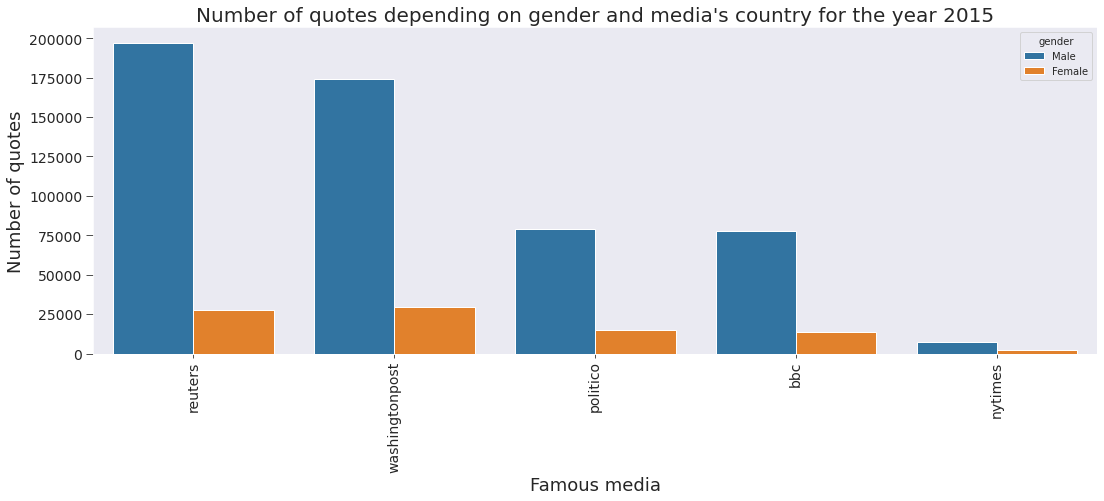

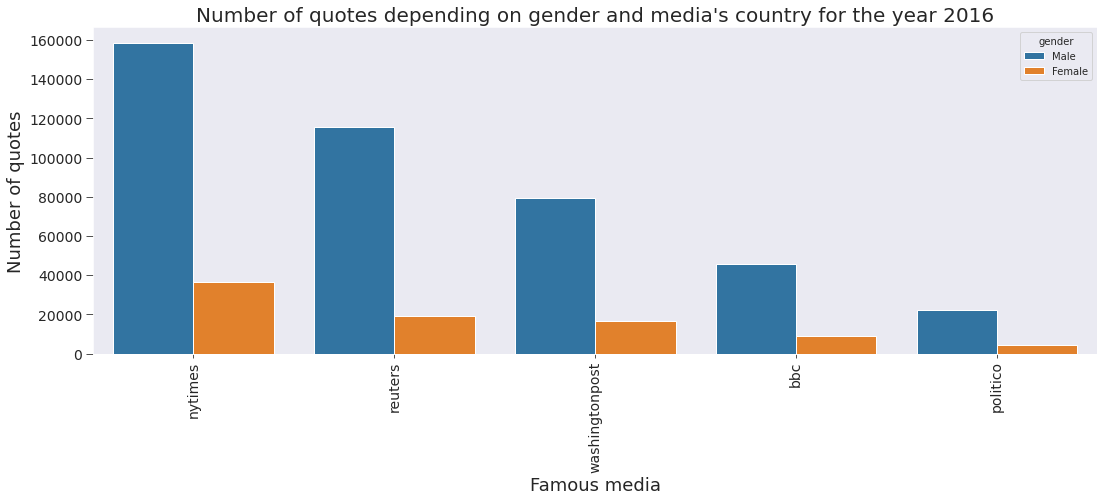

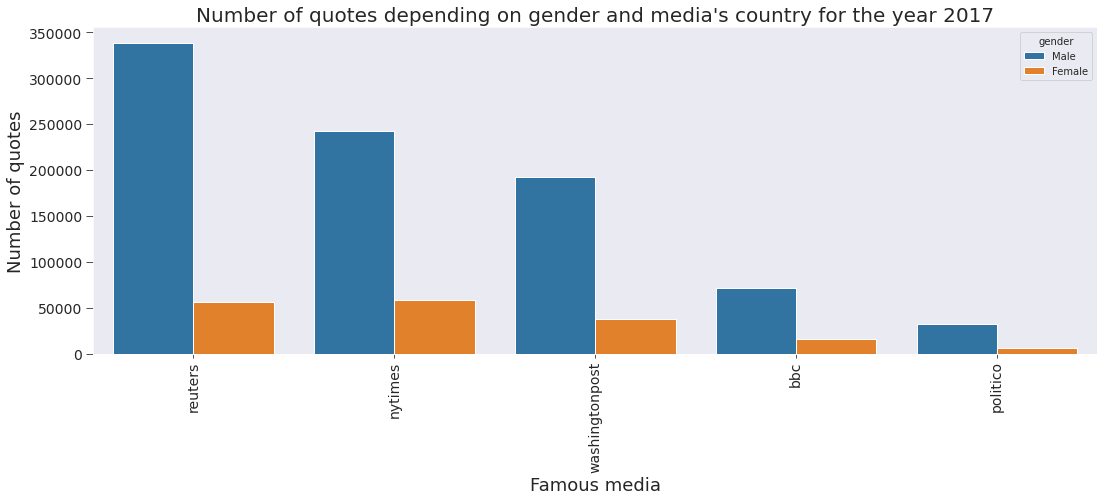

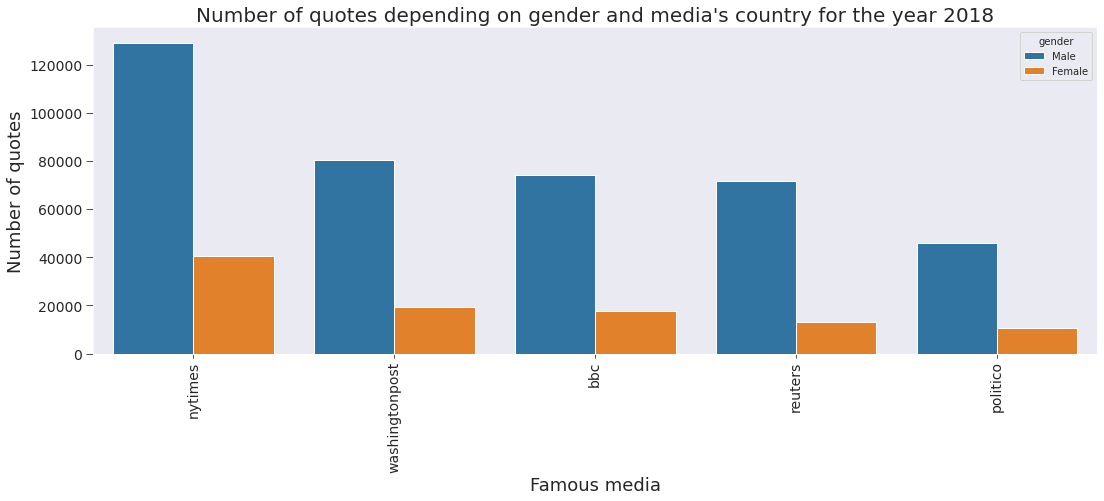

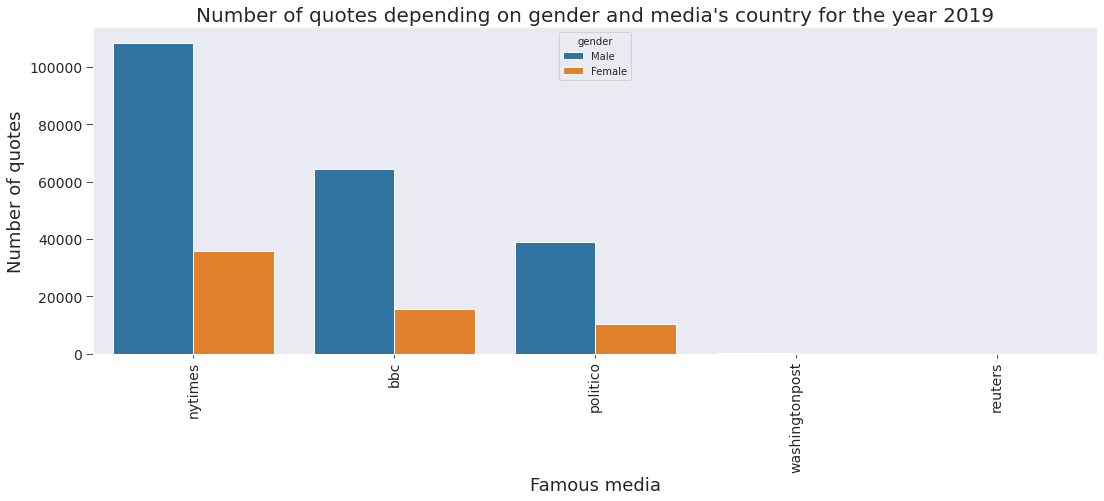

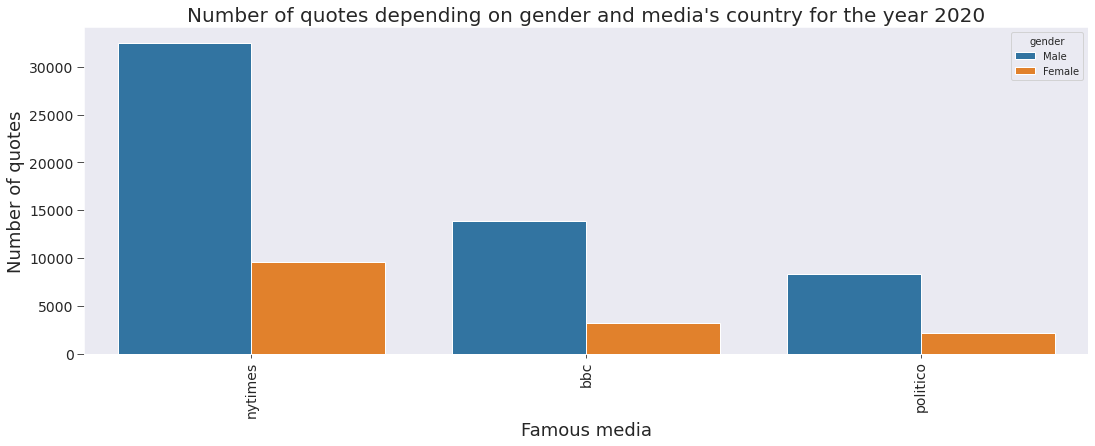

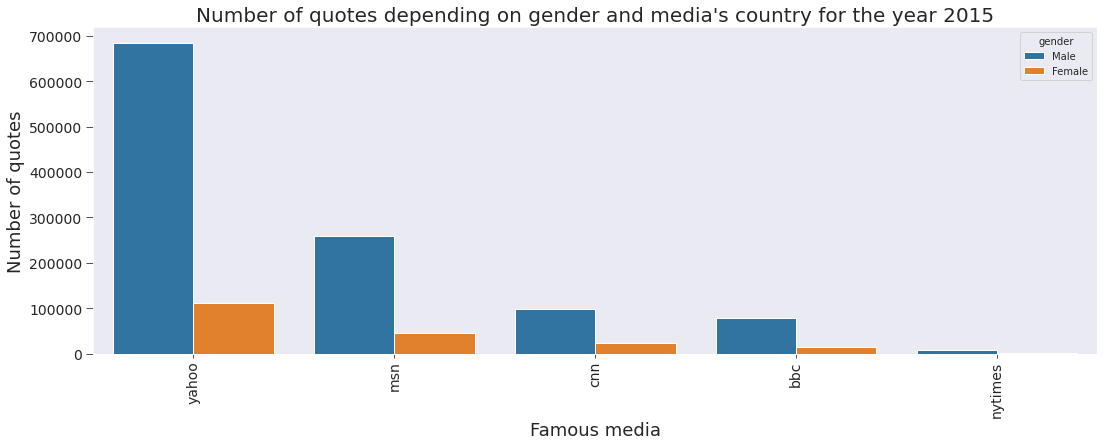

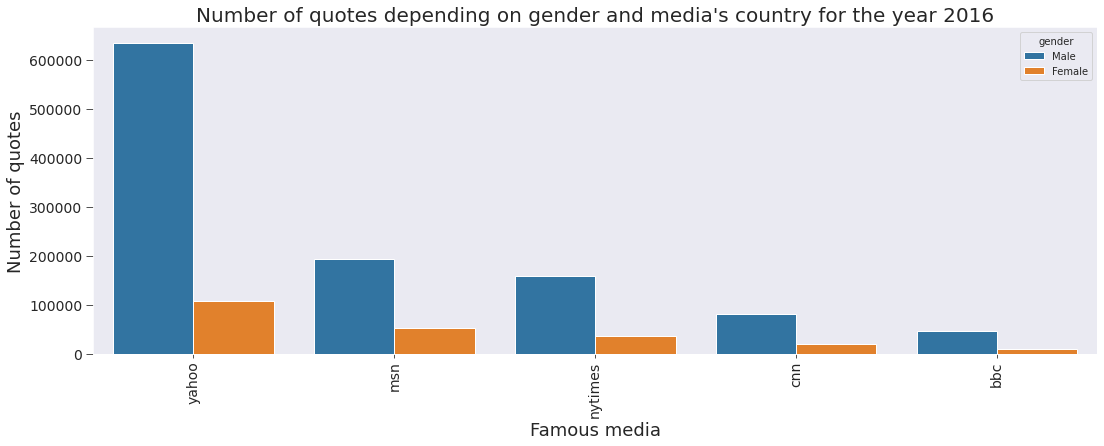

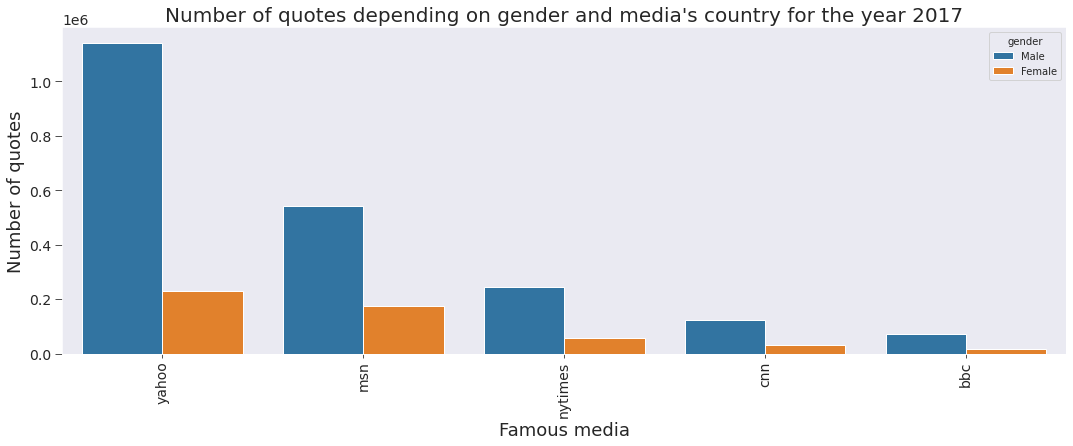

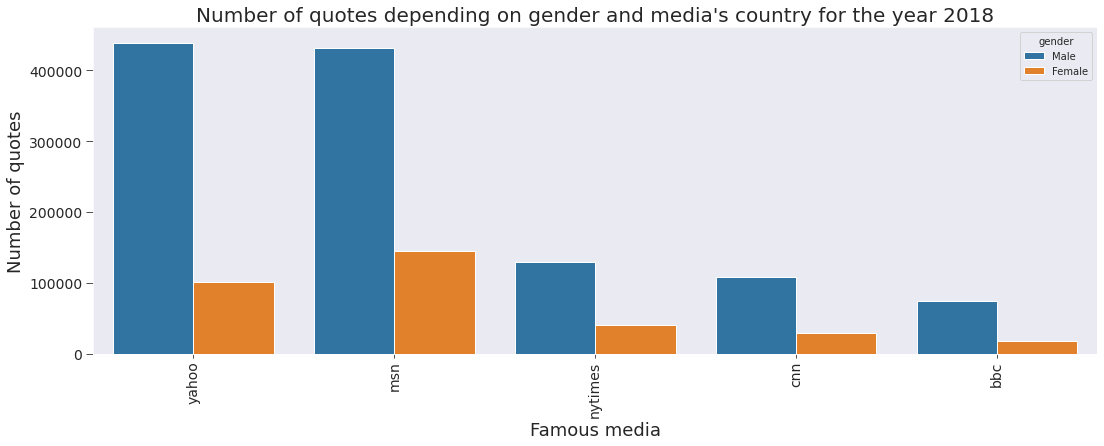

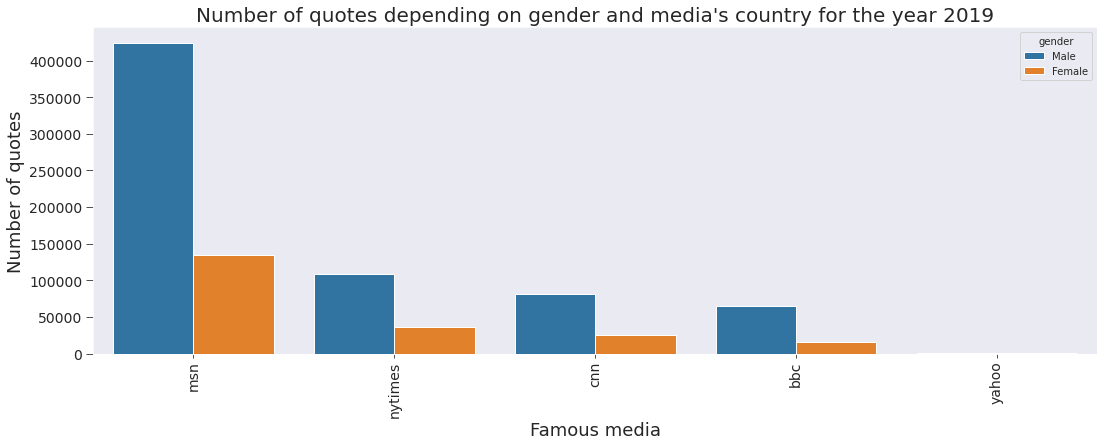

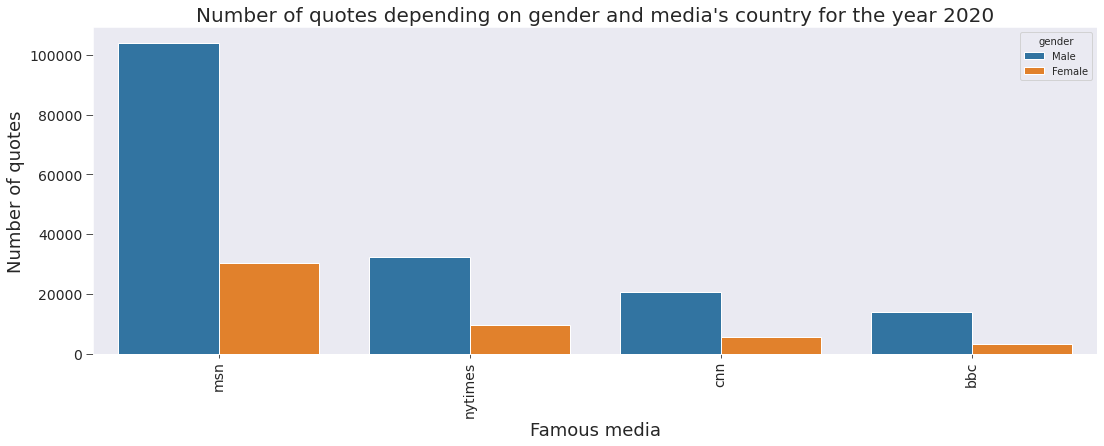

In [71]:
loop_media_gender(df_list_respect)

loop_media_gender(df_list_popular)

## Proportion of quotes per category

In [72]:
def create_df_categories_proportion(df, threshold_tot = 1000):
    """
        param threshold_tot: Keep only media with at least this number of quotes available
    """
    df_explode = df.explode("tags")
    df_category = df_explode.groupby(["tags","gender"]).quoteID.count().to_frame(name="Count").sort_values(['Count'],ascending=False).reset_index()
    df_category_tot = df_category.groupby(['tags']).Count.sum().to_frame(name="Total").reset_index()
    df_category = df_category.merge(df_category_tot, on='tags')
    df_category = df_category[df_category.Total > threshold_tot]
    df_category['Proportion']  = (df_category['Count']/df_category['Total'])*100
    year = df.iloc[0]["quoteID"][0:4]
    df_category["Year"] = year
    return df_category


"""
Probably not to be used, gives graph with not much interest
"""
def plot_quotes_categories(df_category, year):
    """
        Function to plot the number of quotes depending on `tags` and `gender`
    :param df: dataframe 
    """
    #create plot
    f = plt.figure(figsize=(18,6))
    ax = sns.barplot(data=df_category.sort_values(by = ["tags"]), x='tags',y='Proportion', hue='gender')
    plt.xlabel('Category')
    plt.ylabel('Proportion of quotes')
    
    
    plt.title(f'Proportion of quotes depending on gender media for the year '+year)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45,  horizontalalignment='right')

"""
Probably not to be used, gives graph with not much interest
"""

def loop_categories_gender(df_list):
    for df in df_list:
        year = df['quoteID'].iloc[0][0:4]
        df_categories = create_df_categories_proportion(df)
        plot_quotes_categories(df_categories, year = year)

In [73]:
def loop_all_categories_proportion(df_list):
    df_all_category = pd.DataFrame(columns = ['tags', 'gender', 'Count', 'Total', 'Proportion', 'Year'], dtype='object')
    for df in df_list:
        df_category = create_df_categories_proportion(df)
        df_all_category = df_all_category.append(df_category)
        
    return df_all_category
        
    

In [74]:
# Take 30-40 seconds to run
df_category_all_popular = loop_all_categories_proportion(df_list_popular)
df_category_all_respected = loop_all_categories_proportion(df_list_respect)

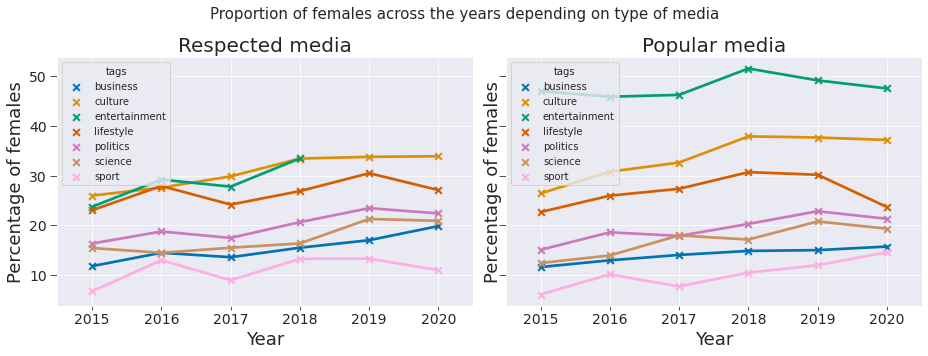

In [75]:
f, axs = plt.subplots(1,2,
                      figsize=(13,5),
                      sharey=True,
                     gridspec_kw=dict(width_ratios=[3,3]))
plt.suptitle("Proportion of females across the years depending on type of media", fontsize = 15)

sns.pointplot(data=df_category_all_popular[df_category_all_popular["gender"] == "Female"].sort_values(by = ["Year", "tags"]), x="Year", y = "Proportion", hue = "tags", markers='x', palette = colorblind_RGB[:7],ax = axs[1])
sns.pointplot(data=df_category_all_respected[df_category_all_respected["gender"] == "Female"].sort_values(by = ["Year", "tags"]), x="Year", y = "Proportion", hue = "tags", markers='x', palette = colorblind_RGB[:7], ax = axs[0])
axs[1].set(xlabel='Year', ylabel='Percentage of females')
axs[1].grid("True")
axs[0].set(xlabel='Year', ylabel='Percentage of females')
axs[0].grid("True")
axs[0].set_title("Respected media")
axs[1].set_title("Popular media")
f.tight_layout()

In [76]:
# Add new column
df_category_all_popular["type_of_media"] = "Popular"
df_category_all_respected["type_of_media"] = "Respected"

In [77]:
df_category_all_combined = df_category_all_popular.append(df_category_all_respected)

In [78]:
df_category_all_combined_female = df_category_all_combined[df_category_all_combined["gender"] == "Female"]

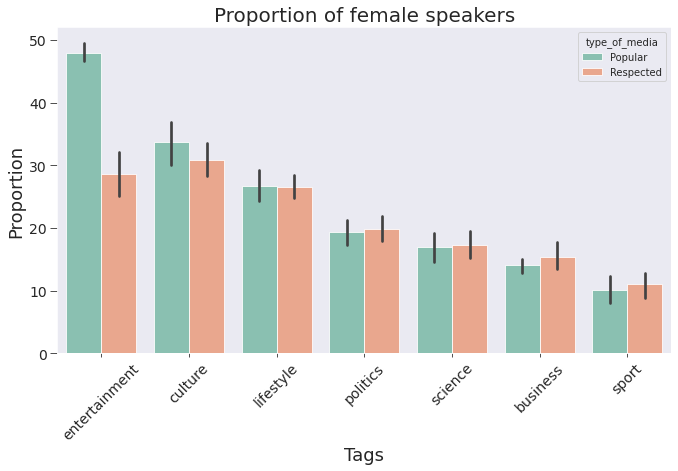

In [196]:
plt.figure(figsize = (11,6))
plt.title("Proportion of female speakers")
ax = sns.barplot(data=df_category_all_combined_female.sort_values(by = ["Proportion"], ascending =False), x='tags',y='Proportion', hue='type_of_media', palette=sns.color_palette("Set2",2), alpha = 0.8)
ax.set(xlabel='Tags')
ax.tick_params(axis = 'x',labelrotation=45)



**Interpretation**

Not sure what to say, help ?
interesting or not ?

"""
PROBABLY NOT, too many plots for nothing Let us look in finner details throughout the years
"""
print("Respected MEDIA")
loop_categories_gender(df_list_respect)
print("Popular MEDIA")
loop_categories_gender(df_list_popular)

### Let's dig deeper: 

The only time and topic where more females were quoted than males (proportionally) was in 2018 for the category of enteirtainment 


In [80]:
df_2018_popular_media_tags_exploded = df_2018_popular_media.explode("tags")
df_2018_entertainment_popular = df_2018_popular_media_tags_exploded[df_2018_popular_media_tags_exploded["tags"] == "entertainment"]

In [81]:
# Sanity check
df_2018_entertainment_popular["gender"].value_counts()

# We do have indeed more female occurences than males

Female    47547
Male      44578
Name: gender, dtype: int64

In [82]:
# Separate the dataframe by gender
df_2018_entertainment_popular_female = df_2018_entertainment_popular[df_2018_entertainment_popular["gender"] == "Female"]
df_2018_entertainment_popular_male = df_2018_entertainment_popular[df_2018_entertainment_popular["gender"] == "Male"]

In [83]:
# Count the number of unique female speakers
print(f" We find {df_2018_entertainment_popular_female.speaker.nunique()} unique female speakers and {df_2018_entertainment_popular_male.speaker.nunique()} unique men")

 We find 3845 unique female speakers and 6382 unique men


**Intepretation**

It is interesting to note that even though the number of quotes is higher, the number of speakers for females is much smaller than that of men. 

In [84]:
df_2018_entertainment_popular_female["speaker"].value_counts()[:5]

Meghan Markle     1077
Kim Kardashian    1039
Roseanne Barr      593
Chrissy Teigen     525
Demi Lovato        517
Name: speaker, dtype: int64

In [85]:
df_2018_entertainment_popular_male["speaker"].value_counts()[:5]

Kanye West                475
Donald Trump Jr. .        385
Prince Harry              363
Ryan Reynolds             288
President Donald Trump    285
Name: speaker, dtype: int64

TODO:
help please to find a nice way we could present this data

## Let us dig again, instead of number of quotes, we may look at the unique number of speakers 

Indeed, we may have a higher proportion of quotes from a certain gender but it may be just a handful of people from that gender we deem important.
It is also interesting to see the spread of females/males that are quoted

In [86]:
# Takes 30 seconds
df_speakers_all_popular = append_all_df(df_list_popular, columns = ["gender", "speaker", "tags", "age_range", "Year", "sitenames"]).explode("tags")
df_speakers_all_respect = append_all_df(df_list_respect, columns = ["gender", "speaker", "tags", "age_range", "Year", "sitenames"]).explode("tags")

In [87]:
df_nunique_popular = df_speakers_all_popular.groupby("gender").speaker.nunique()
df_nunique_respect = df_speakers_all_respect.groupby("gender").speaker.nunique()

In [88]:

print(f"For the popular media we find {df_nunique_popular.Male} unique male speakers and {df_nunique_popular.Female} female speakers")
print(f"This represents {df_nunique_popular.Female/(df_nunique_popular.Male + df_nunique_popular.Female)*100} percent of female speaker")

print(f"For the respected media we find {df_nunique_respect.Male} unique male speakers and {df_nunique_respect.Female} female speakers")
print(f"This represents {df_nunique_respect.Female/(df_nunique_respect.Male + df_nunique_respect.Female)*100} percent of female speaker")

For the popular media we find 177690 unique male speakers and 53233 female speakers
This represents 23.05227283553392 percent of female speaker
For the respected media we find 117119 unique male speakers and 33562 female speakers
This represents 22.27354477339545 percent of female speaker


In [89]:
df_tags_nunique_respect = df_speakers_all_respect.groupby(["tags", "gender"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()
df_tags_nunique_popular = df_speakers_all_popular.groupby(["tags", "gender"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()

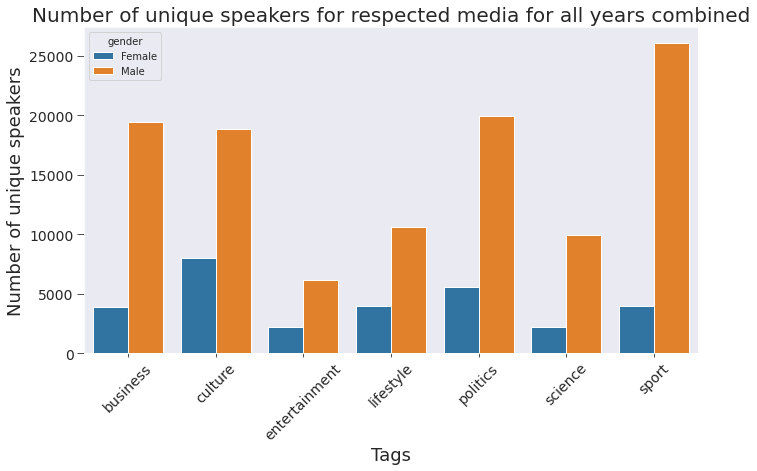

In [90]:
plt.figure(figsize = (11,6))
plt.title("Number of unique speakers for respected media for all years combined")
ax = sns.barplot(data = df_tags_nunique_respect, x = "tags", y = "unique_speaker_per_tag", hue = "gender")
ax.set(xlabel='Tags', ylabel='Number of unique speakers')
ax.tick_params(axis = 'x',labelrotation=45)

In [92]:
# Compute the number of males speaking as one female is speaking
df_tags_nunique_respect_male = df_tags_nunique_respect[df_tags_nunique_respect["gender"] == "Male"].reset_index()
df_tags_nunique_respect_female = df_tags_nunique_respect[df_tags_nunique_respect["gender"] == "Female"].reset_index()

df_tags_nunique_respect_males_for_female = df_tags_nunique_respect_female.copy()
df_tags_nunique_respect_males_for_female["Factor"] = df_tags_nunique_respect_male["unique_speaker_per_tag"] / df_tags_nunique_respect_female["unique_speaker_per_tag"]
df_tags_nunique_respect_males_for_female.drop(columns = ["index", "gender", "unique_speaker_per_tag"], inplace = True)
df_tags_nunique_respect_males_for_female["type_of_media"] = "Respected"

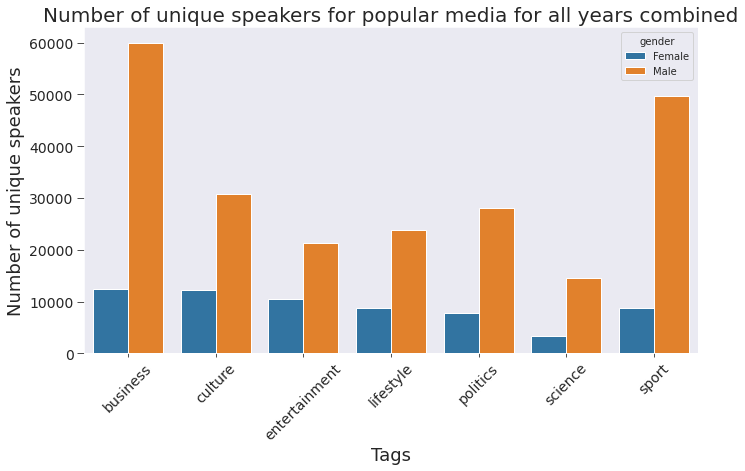

In [93]:
plt.figure(figsize = (11,6))
plt.title("Number of unique speakers for popular media for all years combined")
ax = sns.barplot(data = df_tags_nunique_popular, x = "tags", y = "unique_speaker_per_tag", hue = "gender")
ax.set(xlabel='Tags', ylabel='Number of unique speakers')
ax.tick_params(axis = 'x',labelrotation=45)

In [94]:
# Compute the number of males speaking as one female is speaking
df_tags_nunique_popular_male = df_tags_nunique_popular[df_tags_nunique_popular["gender"] == "Male"].reset_index()
df_tags_nunique_popular_female = df_tags_nunique_popular[df_tags_nunique_popular["gender"] == "Female"].reset_index()

df_tags_nunique_popular_males_for_female = df_tags_nunique_popular_female.copy()
df_tags_nunique_popular_males_for_female["Factor"] = df_tags_nunique_popular_male["unique_speaker_per_tag"] / df_tags_nunique_popular_female["unique_speaker_per_tag"]
df_tags_nunique_popular_males_for_female.drop(columns = ["index", "gender", "unique_speaker_per_tag"], inplace = True)

df_tags_nunique_popular_males_for_female["type_of_media"] = "Popular"

In [95]:
# Append the popular and the respected media with the factors for each category/tag
df_tags_nunique_males_for_female = df_tags_nunique_respect_males_for_female.append(df_tags_nunique_popular_males_for_female)

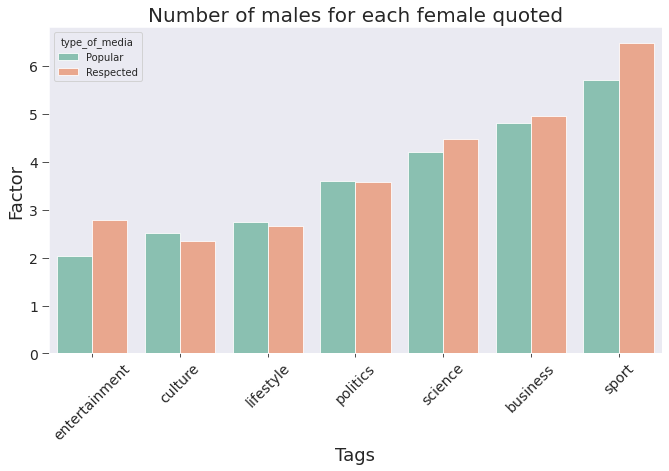

In [208]:
plt.figure(figsize = (11,6))
plt.title("Number of males for each female quoted")
ax = sns.barplot(data=df_tags_nunique_males_for_female.sort_values(by = ["Factor"], ascending =True), x='tags',y='Factor', hue='type_of_media', palette=sns.color_palette("Set2")[:-1], alpha = 0.8)
ax.set(xlabel='Tags')
ax.tick_params(axis = 'x',labelrotation=45)



## This is quite interesting, let us see if we find a trend throughout the years

In [97]:
df_nunique_popular_years = df_speakers_all_popular.groupby(["tags", "gender", "Year"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()
df_nunique_respect_years = df_speakers_all_respect.groupby(["tags", "gender", "Year"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()

In [98]:
df_nunique_popular_years

,tags,gender,Year,unique_speaker_per_tag
0,business,Female,2015,4160
1,business,Female,2016,3304
2,business,Female,2017,5751
3,business,Female,2018,3330
4,business,Female,2019,1861
...,...,...,...,...
79,sport,Male,2016,17296
80,sport,Male,2017,25465
81,sport,Male,2018,18977
82,sport,Male,2019,9986


In [240]:
# This function is used in order to add some transparency to the colors for the background
def make_rgb_transparent(rgb, bg_rgb, alpha):
    return tuple([alpha * c1 + (1 - alpha) * c2
            for (c1, c2) in zip(rgb, bg_rgb)])

In [256]:
# Colors used for the plots aboce with popular and respected media
popular_color = sns.color_palette("Set2")[0]
respect_color = sns.color_palette("Set2")[1]

In [260]:
white = [1, 1, 1]
alpha = 0.3
popular_color_alpha = make_rgb_transparent(popular_color, white, alpha)
respect_color_alpha = make_rgb_transparent(respect_color, white, alpha)

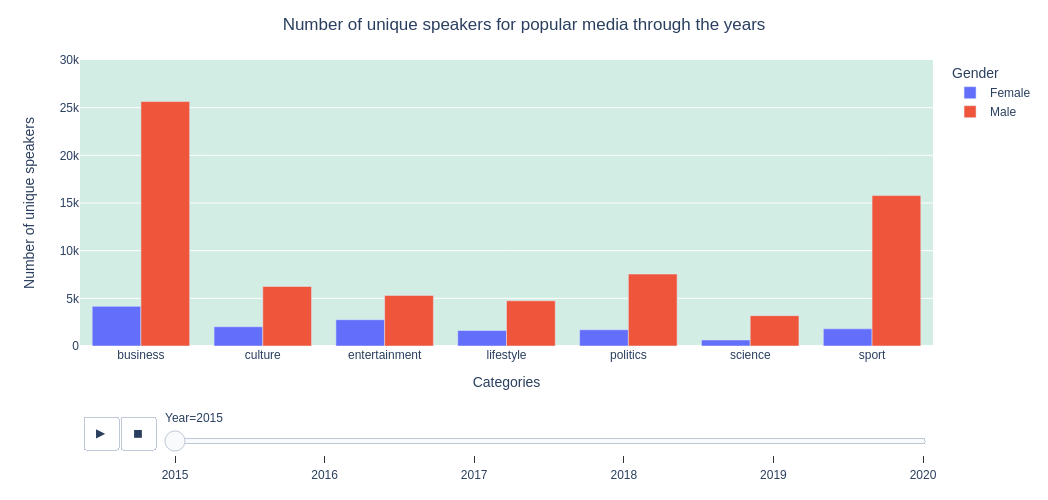

In [261]:
figure = px.bar(
    data_frame=df_nunique_popular_years, 
    x="tags", 
    y="unique_speaker_per_tag", 
    color = "gender",
    animation_frame="Year", 
    hover_name="tags", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "unique_speaker_per_tag": "Number of unique speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    range_y =[0, 30000],
                 width=800, height=500
)
figure.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
figure.update_layout(title_text='Number of unique speakers for popular media through the years', title_x=0.5, plot_bgcolor=f'rgb{popular_color_alpha}')

figure.show()

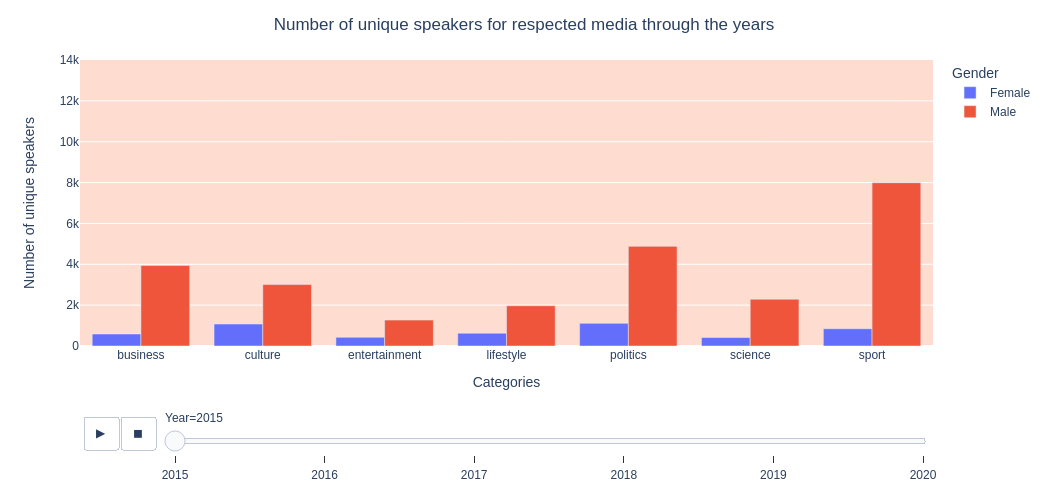

In [262]:
figure = px.bar(
    data_frame=df_nunique_respect_years, 
    x="tags", 
    y="unique_speaker_per_tag", 
    color = "gender",
    animation_frame="Year", 
    hover_name="tags", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "unique_speaker_per_tag": "Number of unique speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    range_y =[0, 14000],
                 width=800, height=500
)
figure.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
figure.update_layout(title_text='Number of unique speakers for respected media through the years', title_x=0.5,  plot_bgcolor=f'rgb{respect_color_alpha}')

figure.show()